In [2]:
import numpy as np
import numpy.polynomial.polynomial as npl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import pickle
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2

In [3]:
prtest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb')))
#testing set - images stored as 50 x 50 arrays
ftest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb')))
#testing set - fluxes
ft = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb')))
#training set - images stored as 50 x 50 arrays
prt = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb')))
#training set - fluxes
ntest, ytest, xtest = prtest.shape
nt, yt, xt =ntest, ytest, xtest
n, y, x = prt.shape

In [4]:
#mean square error - normalise data, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r - squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot

In [5]:
%store -r MEAN
%store -r FLIPH0
%store -r FLIPH1
%store -r CUBEH0
%store -r CUBEH1
%store -r MSR500H0
%store -r MSR500H1
%store -r MSR1000H0
%store -r MSR1000H1
%store -r MSR1500H0
%store -r MSR1500H1
%store -r MSRPROPH0
%store -r MSRPROPH1

In [57]:
#creating the 'column' vectors

###train
COLM = prt.sum(axis=1)
%store COLM

#test
COLMTEST = prtest.sum(axis=1)
%store COLMTEST

Stored 'COLM' (ndarray)
Stored 'COLMTEST' (ndarray)


In [70]:
COLMLESS = COLM[:,4:48]
COLMLESSTEST = COLMTEST[:,4:48]

In [72]:
#linear regression and test mse and rsquared
ytest = LR().fit(COLMLESS,np.array(ft)).predict(COLMLESSTEST)
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  28.318339384950114
rsq =  0.8584083030752494


In [73]:
COLMLESS.shape

(1000, 44)

In [74]:
MEAN.shape

(1000,)

In [86]:
%store -r MEANTEST

In [84]:
np.hstack((COLMLESS,np.array([MEAN]).T))

array([[2.19494952e+00, 1.18324526e+01, 2.34306769e+01, ...,
        2.29670924e-01, 1.89284254e-02, 9.13612154e+02],
       [6.46856071e-01, 2.44121135e+00, 5.37353329e+00, ...,
        4.12842971e-01, 3.60840846e-02, 9.71604049e+02],
       [1.60507832e+00, 7.01312285e+00, 1.35722651e+01, ...,
        1.42941683e+00, 9.57447548e-02, 1.06053428e+03],
       ...,
       [3.05435440e+00, 9.79433885e+00, 1.41482398e+01, ...,
        1.03704601e+00, 6.61975742e-02, 9.52561956e+02],
       [1.17838331e+00, 3.51936109e+00, 6.77632788e+00, ...,
        3.07615927e-01, 3.57622077e-02, 9.02389109e+02],
       [2.63515172e+00, 7.86643819e+00, 1.40673567e+01, ...,
        2.46328209e-01, 2.20208487e-02, 1.09452559e+03]])

In [87]:
#linear regression and test mse and rsquared COLMLESS plus MEAN
ytest = LR().fit(np.hstack((COLMLESS,np.array([MEAN]).T)),np.array(ft)).predict(np.hstack((COLMLESSTEST,np.array([MEANTEST]).T)))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  28.27870135013891
rsq =  0.8586064932493054


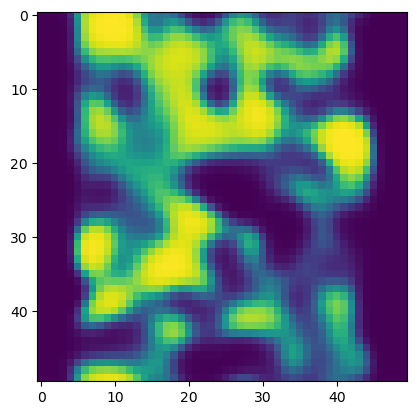

In [49]:
plt.imshow(prt[0])

In [14]:
#linear regression and test mse and rsquared
ytest = LR().fit(COLM,np.array(ft)).predict(COLMTEST)
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  29.223272630675737
rsq =  0.8538836368466213


In [38]:
#creating the 'pixel' vectors

###train
PIXEL = prt.reshape((n,x*y))
%store PIXEL
#test
PIXELTEST = prtest.reshape((nt,xt*yt))
%store PIXELTEST

Stored 'PIXEL' (ndarray)
Stored 'PIXELTEST' (ndarray)


In [40]:
#linear regression and test mse and rsquared
ytest = LR().fit(PIXEL,np.array(ft)).predict(PIXELTEST)
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))
MSE(ytest,ftest)

nmse =  121.94386139971552
rsq =  0.3902806930014223


0.002754638321607037

In [43]:
r2(ytest,ftest)


0.5623291381874015

In [ ]:
## add into all the topological methods